# Data Visualization with Python

### For this project, we will be working with the Coursera Course Dataset to analyze and visualize insights about the courses offered on Coursera. Here's a step-by-step approach we can follow to perform data analysis, including data cleaning, exploratory data analysis (EDA), and visualization.

## Business Case
This dataset contains information about various coursera online courses. The objective of this analysis is to understand course popularity, ratings, and enrollment trends. The insights derived will help in making recommendations for improving course offerings, identifying popular topics, and enhancing the learning experience for users.

## Step 1: Load and Inspect the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
coursera_df = pd.read_csv('coursera_courses.csv')
coursera_df= coursera_df.drop("Unnamed: 0",axis=1)
# Inspect the first few rows
coursera_df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Step 2: Data Cleaning

In [2]:
# Check data types
coursera_df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [3]:
# Checking for missing values
coursera_df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [4]:
# Get the number of unique values for each column
coursera_df.nunique()

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

### Converting course_students_enrolled to numeric

In [5]:
def preprocess_no_of_stu_enrolled(x):
    """
    Preprocess the 'students_enrolled' column to convert strings with abbreviations
    like 'k' or 'M' into integers.
    """
    if isinstance(x, str):
        # Handle cases where 'k' stands for thousand
        if 'k' in x.lower():
            return int(float(x.lower().replace('k', '')) * 1000)
        # Handle cases where 'M' stands for million
        elif 'm' in x.lower():
            return int(float(x.lower().replace('m', '')) * 1000000)
        else:
            return int(x.replace(',', ''))  # Handle regular numbers with commas
    return x  # If it's already a number, return as is


In [6]:
coursera_df['course_students_enrolled'] = coursera_df['course_students_enrolled'].apply(lambda x: preprocess_no_of_stu_enrolled(x))

In [7]:
# Check data types
coursera_df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object

### Visualizing Outliers Using Boxplots for Course Rating and Students Enrolled

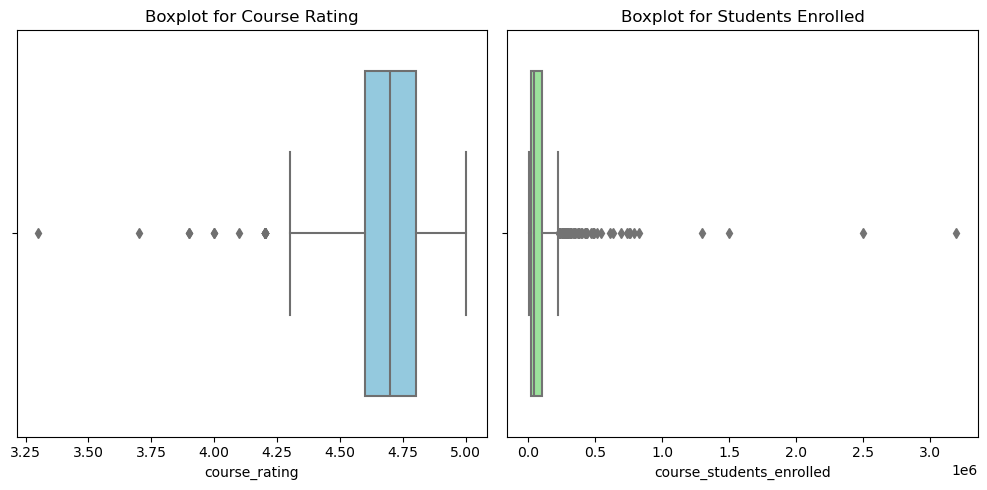

In [8]:
# Boxplots to visualize outliers
plt.figure(figsize=(10, 5))

# Boxplot for 'course_rating'
plt.subplot(1, 2, 1)
sns.boxplot(x=coursera_df['course_rating'], color='skyblue')
plt.title('Boxplot for Course Rating')

# Boxplot for 'students_enrolled'
plt.subplot(1, 2, 2)
sns.boxplot(x=coursera_df['course_students_enrolled'], color='lightgreen')
plt.title('Boxplot for Students Enrolled')

plt.tight_layout()
plt.show()


In [9]:
# Calculate Q1, Q3, and IQR for 'course_rating' and 'students_enrolled'
Q1 = coursera_df[['course_rating', 'course_students_enrolled']].quantile(0.25)
Q3 = coursera_df[['course_rating', 'course_students_enrolled']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR method but do not remove them
outliers = ((coursera_df[['course_rating', 'course_students_enrolled']] < (Q1 - 1.5 * IQR)) |
            (coursera_df[['course_rating', 'course_students_enrolled']] > (Q3 + 1.5 * IQR)))

# You can now check which rows have outliers
outliers_summary = coursera_df[outliers.any(axis=1)]

# Display rows with outliers for inspection
outliers_summary


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
18,Academic English: Writing,"University of California, Irvine",SPECIALIZATION,4.7,Beginner,540000
27,Advanced Data Science with IBM,IBM,SPECIALIZATION,4.4,Advanced,320000
43,An Introduction to Programming the Internet of...,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,270000
...,...,...,...,...,...,...
850,Using Python to Access Web Data,University of Michigan,COURSE,4.8,Mixed,310000
859,Web Design for Everybody: Basics of Web Develo...,University of Michigan,SPECIALIZATION,4.7,Beginner,280000
864,What is Data Science?,IBM,COURSE,4.7,Beginner,260000
869,Write Professional Emails in English,Georgia Institute of Technology,COURSE,4.7,Mixed,270000


In [10]:
# Check for duplicates
print("Duplicates found:", coursera_df.duplicated().sum())

# Remove duplicates
# coursera_df.drop_duplicates(inplace=True)


Duplicates found: 0


## Basic Queries and Filtering Data

### Filter Courses Based on Rating

In [11]:
# Filter courses with rating >= 4.5
high_rated_courses = coursera_df[coursera_df['course_rating'] >= 4.5]

# Display the filtered data
high_rated_courses.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


### Selecting Specific Columns

In [12]:
# Select specific columns
selected_columns = coursera_df[['course_title', 'course_rating']]

# Display the first few rows
selected_columns.head()

,course_title,course_rating
0,(ISC)² Systems Security Certified Practitioner...,4.7
1,A Crash Course in Causality: Inferring Causal...,4.7
2,A Crash Course in Data Science,4.5
3,A Law Student's Toolkit,4.7
4,A Life of Happiness and Fulfillment,4.8


### Filter Courses with Enrollment Between 10k and 20k

In [13]:
# Filter courses with enrollment between 10,000 and 20,000
filtered_courses = coursera_df[(coursera_df['course_students_enrolled'] >= 10000) & 
                               (coursera_df['course_students_enrolled'] <= 20000)]

# Display the filtered courses
filtered_courses.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12000
11,AI for Medicine,deeplearning.ai,SPECIALIZATION,4.7,Intermediate,13000
13,AWS Fundamentals: Addressing Security Risk,Amazon Web Services,COURSE,4.3,Beginner,11000
16,AWS Fundamentals: Migrating to the Cloud,Amazon Web Services,COURSE,4.5,Intermediate,13000


### Filter Courses with High Rating and Large Enrollment

In [14]:
# Filter courses with rating > 4.5 and more than 20,000 students enrolled
popular_high_rated_courses = coursera_df[(coursera_df['course_rating'] > 4.5) & 
                                         (coursera_df['course_students_enrolled'] > 20000)]

# Display the filtered data
popular_high_rated_courses.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000


### Sorting values based on rating

In [15]:
# Sort the DataFrame by 'course_rating' in descending order and show the top 10 rows
coursera_df.sort_values(by="course_rating", ascending = False).head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600
754,Stories of Infection,Stanford University,COURSE,4.9,Intermediate,28000
290,Everyday Parenting: The ABCs of Child Rearing,Yale University,COURSE,4.9,Beginner,86000
98,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9500
99,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.9,Beginner,57000
614,More Introduction to Financial Accounting,University of Pennsylvania,COURSE,4.9,Mixed,40000
102,Bugs 101: Insect-Human Interactions,University of Alberta,COURSE,4.9,Beginner,15000
836,Understanding Einstein: The Special Theory of ...,Stanford University,COURSE,4.9,Beginner,89000
103,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,COURSE,4.9,Mixed,95000


## Step 3: Exploratory Data Analysis

### Top 5 Courses based on course rating

In [16]:
# Select the top 5 courses with the highest ratings

famous_courses = coursera_df.nlargest(5,'course_rating')
famous_courses.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600
36,Agile и Scrum в работе над проектами и продуктами,ScrumTrek,COURSE,4.9,Beginner,12000
40,American Contract Law I,Yale University,COURSE,4.9,Beginner,18000
61,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.9,Beginner,180000


### Correlation Analysis of Numerical Features

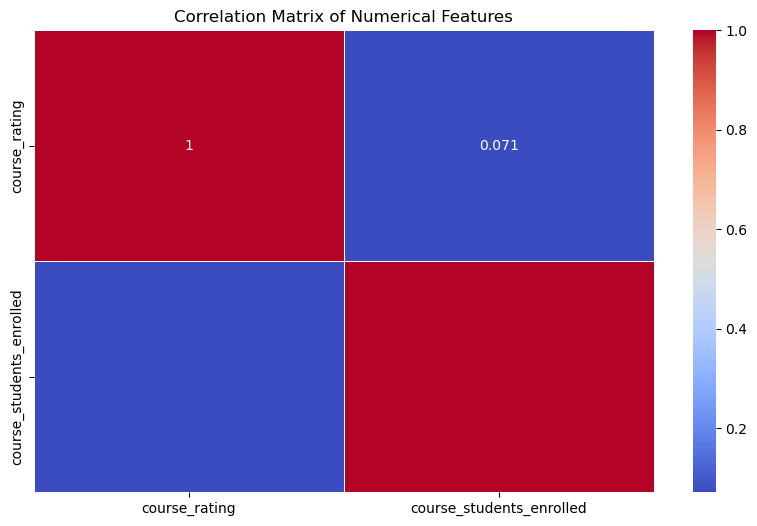

In [17]:
# Select numerical columns for correlation analysis
numerical_cols = ['course_rating', 'course_students_enrolled']

# Create a correlation matrix
corr_matrix = coursera_df[numerical_cols].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Group by Course Rating and Calculate Median of Numeric Features

In [18]:
# Group by 'course_rating' and calculate the median for numeric columns
coursera_df.groupby('course_rating').median(numeric_only=True).sort_values(by="course_rating", ascending=False)

,course_students_enrolled
course_rating,
5.0,1550.0
4.9,45000.0
4.8,43000.0
4.7,43000.0
4.6,42500.0
4.5,36000.0
4.4,44500.0
4.3,29000.0
4.2,19500.0


### Top 5 courses based on number of students

In [19]:
top_5_courses = coursera_df.nlargest(5,'course_students_enrolled')
top_5_courses.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000


### Visualize the top 5 courses based on number of students using bar graph

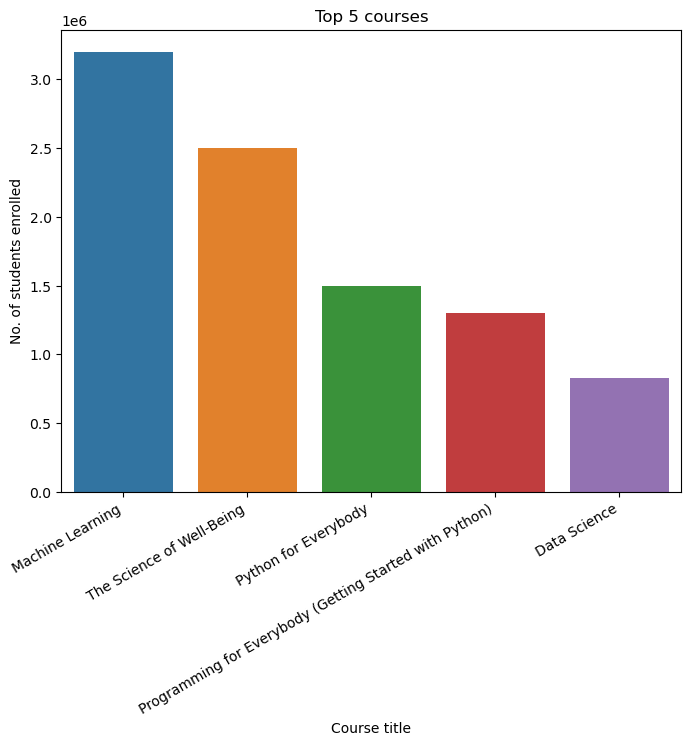

In [20]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='course_title', y='course_students_enrolled', data=top_5_courses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_xlabel('Course title')
ax.set_ylabel('No. of students enrolled')
ax.set_title('Top 5 courses')
plt.show()

### Total number of courses available in coursera based on the course difficulty and visuallize it in a pie chart

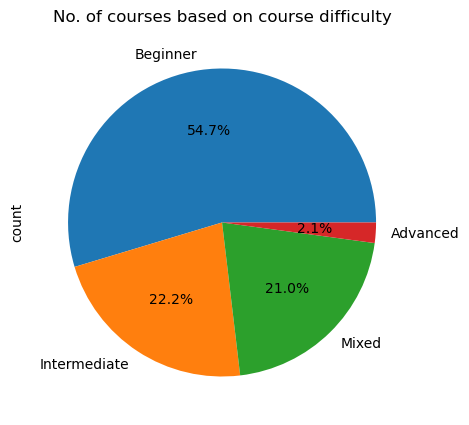

In [21]:
# Create a DataFrame with the value counts of 'course_difficulty'
total_courses = coursera_df['course_difficulty'].value_counts().reset_index()

# Rename the columns
total_courses.columns = ['course_difficulty', 'count']

# Plot the pie chart
total_courses.set_index('course_difficulty').plot.pie(y='count', figsize=(5, 5), autopct='%1.1f%%',
                                                      title='No. of courses based on course difficulty', legend=False);


### Top 5 organizations contributing courses in coursera platform

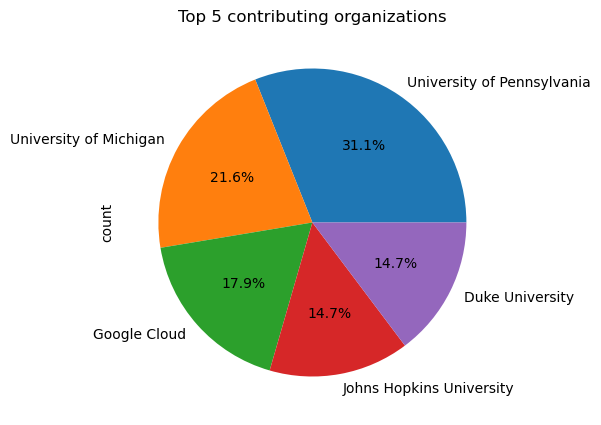

In [22]:
# Create a DataFrame with the value counts of 'course_organization'
total_organization = coursera_df['course_organization'].value_counts().reset_index()

# Rename the columns
total_organization.columns = ['course_organization', 'count']

# Select the top 5 organizations by count
top_organization = total_organization.nlargest(5, 'count')

# Plot the pie chart
top_organization.set_index('course_organization').plot.pie(y='count', figsize=(5, 5), autopct='%1.1f%%',
                                                           title='Top 5 contributing organizations', legend=False);

## Course Ratings Analysis

### Visualization of the distribution of course ratings using a histogram or boxplot to show how courses are rated overall.

D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


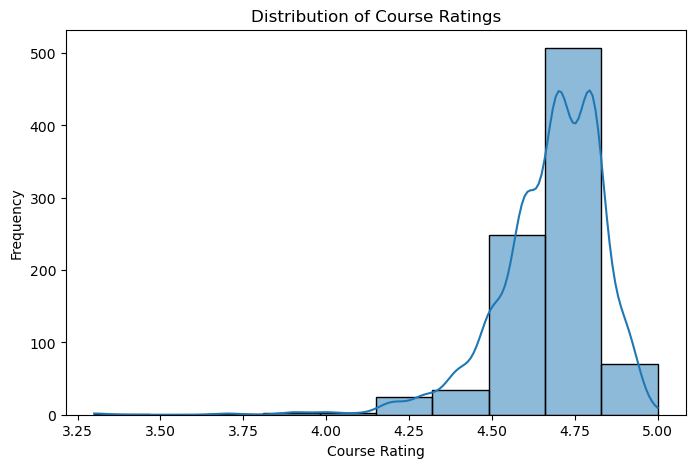

In [23]:
# Plot the distribution of course ratings
plt.figure(figsize=(8, 5))
sns.histplot(coursera_df['course_rating'], bins=10, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()


### Histogram with 10 bins and a KDE curve overlay
The histogram for course ratings shows that most courses have ratings concentrated between 3.5 and 4.5, indicating a general trend toward higher ratings. The KDE line suggests a slight skew, but the majority of ratings fall within this range. The distribution also has a few lower-rated courses, but outliers on either side are minimal.

###  Calculate and plot the average rating for each organization. Use a bar chart to show which organizations offer the highest-rated courses.

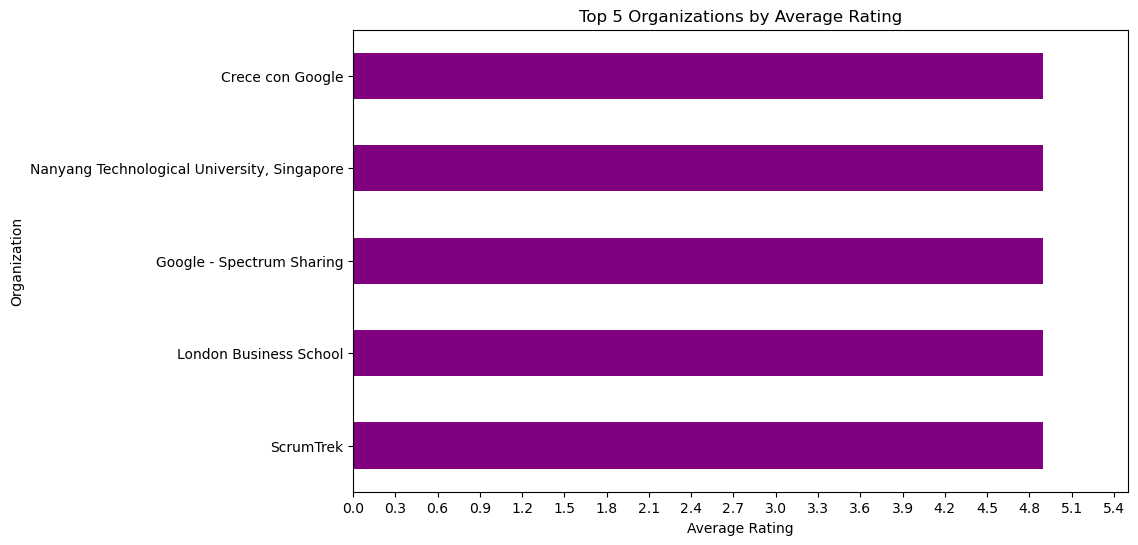

In [24]:
# Round the average ratings to the nearest 0.5
avg_rating_org = coursera_df.groupby('course_organization')['course_rating'].mean().round(1).sort_values(ascending=False).head(5)

# Horizontal bar plot for top 5 organizations by average rating
plt.figure(figsize=(10, 6))
avg_rating_org.plot(kind='barh', color='purple')  # Change to barh for horizontal
plt.title('Top 5 Organizations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Organization')
plt.xlim(0, 5.5)  # Set x-axis limit from 0 to 5.5
plt.xticks(np.arange(0, 5.6, 0.3))  # Set x-axis ticks from 0 to 5 with a step of 0.5
plt.show()


## Students Enrolled

### Correlation between Students Enrolled and Course Rating

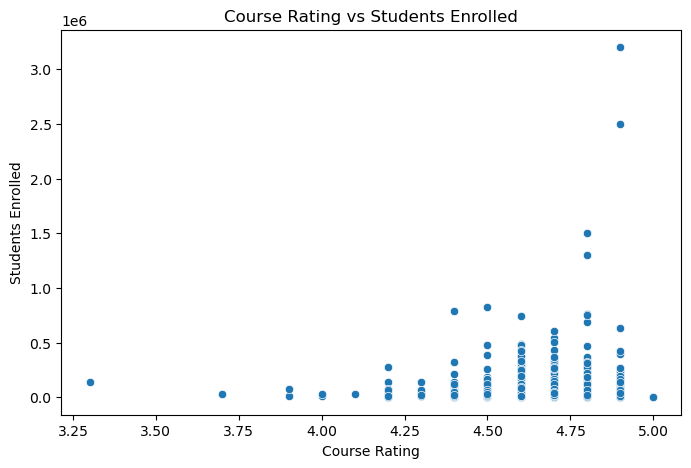

In [25]:
# Scatter plot for rating vs students enrolled
plt.figure(figsize=(8, 5))
sns.scatterplot(x='course_rating', y='course_students_enrolled', data=coursera_df)
plt.title('Course Rating vs Students Enrolled')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.show()


###  Top 10 Courses by Enrollment

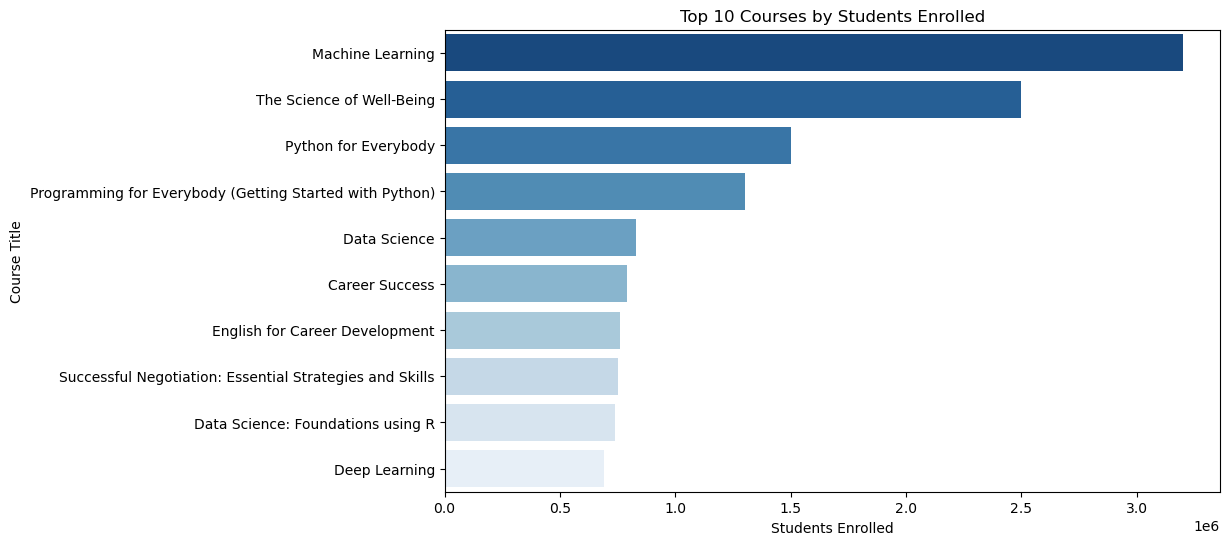

In [26]:
# Top 10 courses by students enrolled
top_enrolled_courses = coursera_df[['course_title', 'course_students_enrolled']].nlargest(10, 'course_students_enrolled')

# Bar plot for top 10 courses by enrollment
plt.figure(figsize=(10, 6))
sns.barplot(x='course_students_enrolled', y='course_title', data=top_enrolled_courses, palette='Blues_r')
plt.title('Top 10 Courses by Students Enrolled')
plt.xlabel('Students Enrolled')
plt.ylabel('Course Title')
plt.show()


###  Distribution of Enrollments

D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


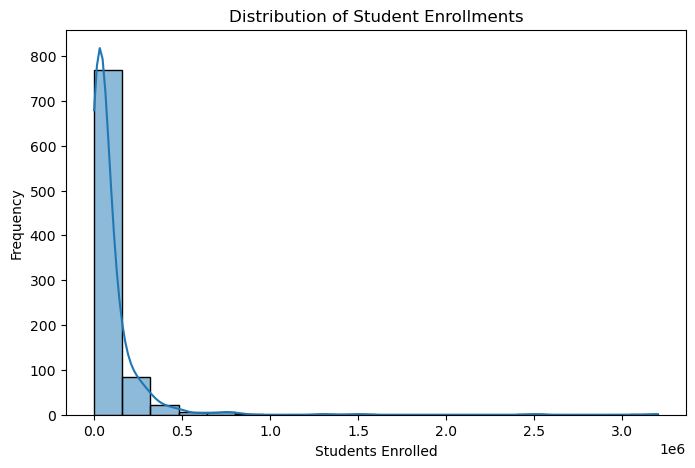

In [27]:
# Plot the distribution of student enrollments
plt.figure(figsize=(8, 5))
sns.histplot(coursera_df['course_students_enrolled'], bins=20, kde=True)
plt.title('Distribution of Student Enrollments')
plt.xlabel('Students Enrolled')
plt.ylabel('Frequency')
plt.show()


## Course Difficulty

### Difficulty vs Enrollment

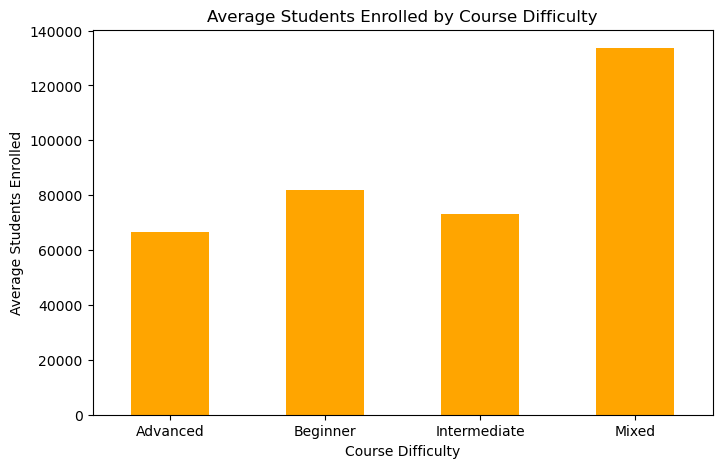

In [28]:
# Average number of students by difficulty level
avg_enrollment_difficulty = coursera_df.groupby('course_difficulty')['course_students_enrolled'].mean()

# Bar plot for difficulty vs enrollment
plt.figure(figsize=(8, 5))
avg_enrollment_difficulty.plot(kind='bar', color='orange')
plt.title('Average Students Enrolled by Course Difficulty')
plt.xlabel('Course Difficulty')
plt.xticks(rotation=0)

plt.ylabel('Average Students Enrolled')
plt.show()


### Course Ratings by Difficulty

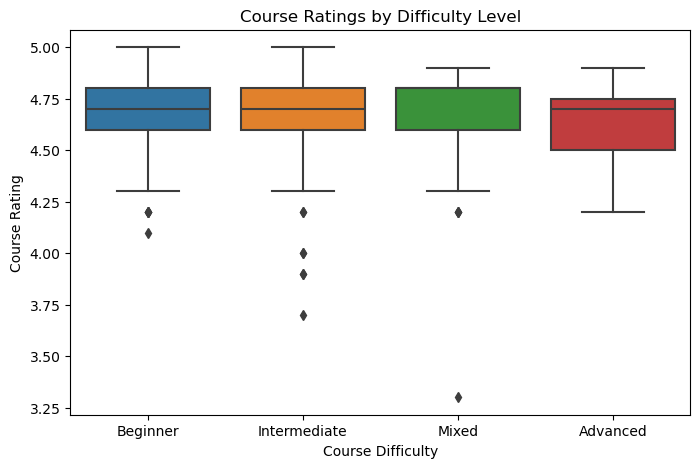

In [29]:
# Boxplot for course ratings by difficulty level
plt.figure(figsize=(8, 5))
sns.boxplot(x='course_difficulty', y='course_rating', data=coursera_df)
plt.title('Course Ratings by Difficulty Level')
plt.xlabel('Course Difficulty')
plt.ylabel('Course Rating')
plt.show()

## Certificate Type Analysis

### Certificate Type Distribution

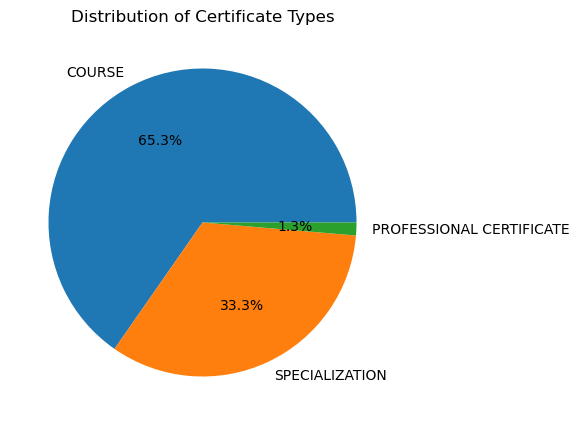

In [30]:
# Pie chart for certificate type distribution
certificate_counts = coursera_df['course_Certificate_type'].value_counts()

certificate_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 5), title='Distribution of Certificate Types')
plt.ylabel('')
plt.show()


### Enrollment by Certificate Type

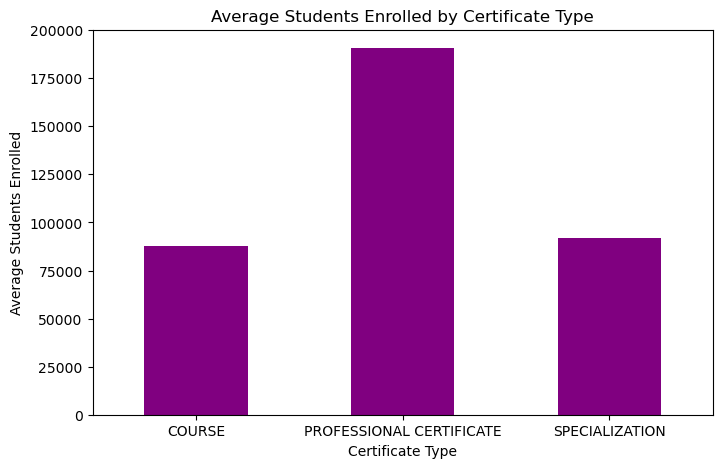

In [31]:
# Bar plot for average students enrolled by certificate type
avg_enrollment_certificate = coursera_df.groupby('course_Certificate_type')['course_students_enrolled'].mean()

plt.figure(figsize=(8, 5))
avg_enrollment_certificate.plot(kind='bar', color='purple')
plt.title('Average Students Enrolled by Certificate Type')
plt.xlabel('Certificate Type')
plt.xticks(rotation=0)

plt.ylabel('Average Students Enrolled')
plt.show()


### Rating by Certificate Type

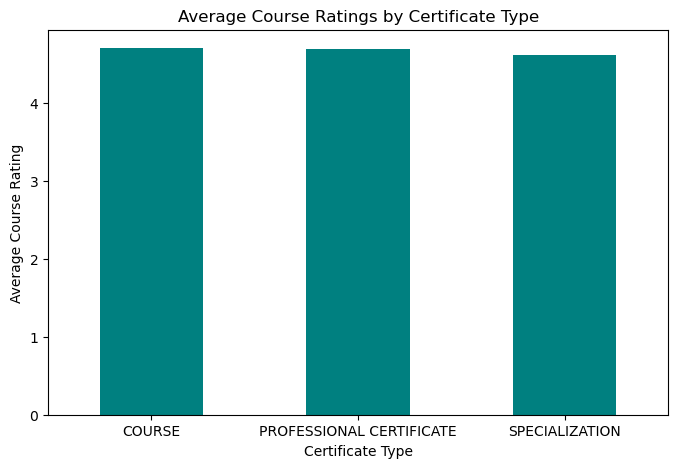

In [32]:
# Bar plot for average course ratings by certificate type
avg_rating_certificate = coursera_df.groupby('course_Certificate_type')['course_rating'].mean()

plt.figure(figsize=(8, 5))
avg_rating_certificate.plot(kind='bar', color='teal')
plt.title('Average Course Ratings by Certificate Type')
plt.xlabel('Certificate Type')
plt.xticks(rotation=0)

plt.ylabel('Average Course Rating')
plt.show()


## Advanced Visualizations

### Pairplot

D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


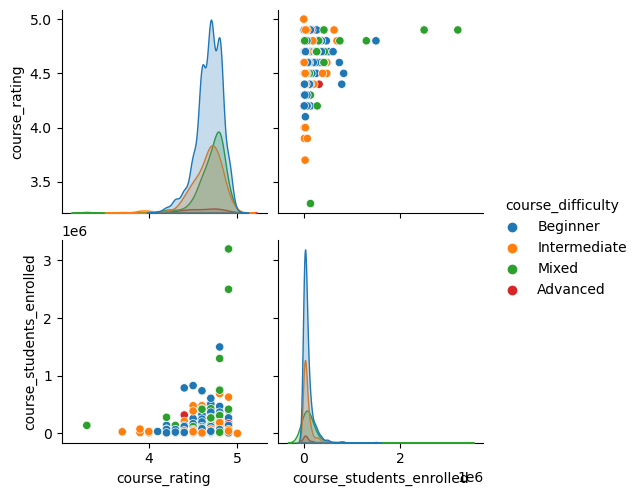

In [33]:
# Pairplot for selected columns
sns.pairplot(coursera_df[['course_rating', 'course_students_enrolled', 'course_difficulty']], hue='course_difficulty')
plt.show()


### Pairplot visualization
The pairplot visualizes the pairwise relationships between course_rating, course_students_enrolled, and course_difficulty. Scatter plots show how these features interact, with each point colored based on course difficulty. This allows for a visual comparison of course ratings and enrollment numbers across different difficulty levels.

### Distribution of Course Ratings and Students Enrolled with KDE Plots

D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Pratyusha\Ananconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


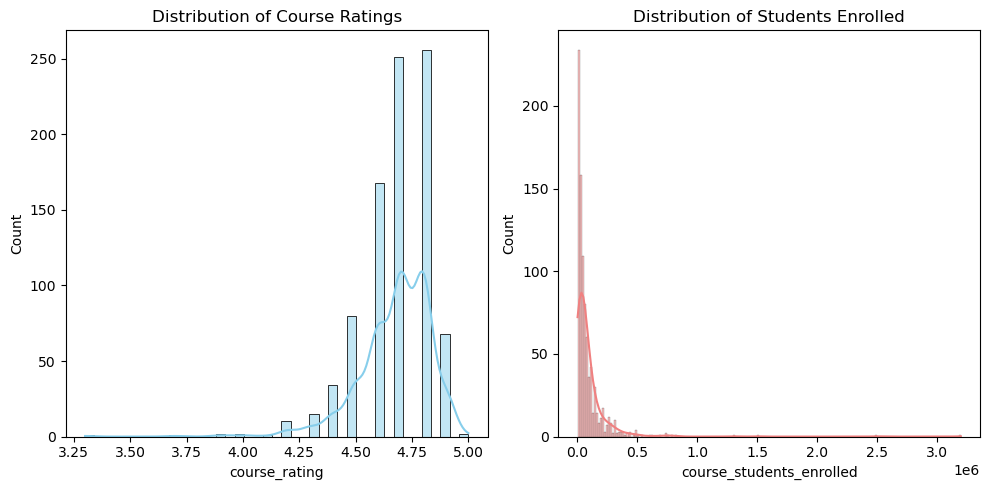

In [34]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(coursera_df['course_rating'], kde=True, color='skyblue')
plt.title('Distribution of Course Ratings')
plt.subplot(1, 2, 2)
sns.histplot(coursera_df['course_students_enrolled'], kde=True, color='lightcoral')
plt.title('Distribution of Students Enrolled')
plt.tight_layout()
plt.show()

The first subplot shows the distribution of course ratings. Most courses tend to have ratings in the range of 3 to 5, with the KDE curve highlighting the peak concentration around 4. In the second subplot, the distribution of students enrolled is plotted. The number of students enrolled per course varies widely, and the KDE curve shows a right-skewed distribution, indicating that most courses have fewer students, while a few have very high enrollments.

## Conclusion:

The analysis shows that most Coursera courses have high ratings, generally between 4.0 and 5.0, indicating strong user satisfaction. Courses with higher ratings also tend to have more enrollments, though there's a wide range of student numbers, from thousands to millions. Outliers were detected in both ratings and enrollment, pointing to exceptionally popular or underperforming courses. Clustering revealed three main course groups, based on ratings and enrollments, and a moderate correlation suggests that while highly rated courses often attract more students, other factors like also play a role in course popularity.

## Further Improvements

- Creating Additional Features: Consider deriving new features such as engagement ratios (students enrolled per rating), average completion time, or course price per hour. These could provide new perspectives for analyzing the attractiveness and value of courses.
- Cluster Analysis for Course Types: If clustering was used to group courses based on ratings or enrollments, it may help to refine these clusters by adding more features (e.g., course duration, subject area) for better segmentation.
- Predictive Modeling: Use machine learning models to predict the future success of courses based on existing features like rating, student enrollment, course price, and content quality. This could help with decision-making for future course offerings.
- Sentiment Analysis: If you have access to course reviews or student feedback, consider applying natural language processing (NLP) to analyze sentiments and better understand factors that drive positive or negative reviews.